In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
if("Analysis" in os.getcwd()):
    os.chdir("../")

from Data_handling.pca_functions import Pca_Fitting
from Data_handling.gaia_query import gaia_cone, bailer_jones_cone, concatenate_gaia_bailer
from Data_handling.vae import Encoder,Decoder, VAE , loss_function, model_train


os.chdir("Analysis")
os.getcwd()

'/Users/mattocallaghan/GES/Analysis'

In [2]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import Adam
from torch.utils.data import DataLoader


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
batch_size = 50 #617 #factor for 1090
lr = 1e-3
epochs = 100

In [4]:
mean = [0,0]
cov = [[1,0],[0,1]]
colour_mag = np.random.multivariate_normal(mean, cov,size=10000)

In [5]:
vae_spec=DataLoader(torch.tensor(colour_mag).float(),batch_size=batch_size) 

In [14]:
zdim=10

In [15]:
encoder = Encoder(input_dim=colour_mag.shape[1], hidden_dims=[20,20], z_dim=zdim,dropout=0.2)
decoder = Decoder(output_dim=colour_mag.shape[1], hidden_dims = [20,20], z_dim=zdim,dropout=0.2)
model = VAE(Encoder=encoder, Decoder=decoder).to(DEVICE)
optimizer=Adam(model.parameters(),lr=lr)

In [16]:
print("Start training VAE...")
model.train()
model_train(vae_spec=vae_spec,model=model,optimizer=optimizer,loss_function=loss_function,epochs=epochs,batch_size=batch_size)

Start training VAE...
	Epoch 1 complete! 	Average Loss:  2.106646136566622
Overall Loss:  20961.12905883789
	Epoch 2 complete! 	Average Loss:  2.047809093992914
Overall Loss:  20375.700485229492
	Epoch 3 complete! 	Average Loss:  2.034484359511179
Overall Loss:  20243.11937713623
	Epoch 4 complete! 	Average Loss:  2.0354829820795874
Overall Loss:  20253.055671691895
	Epoch 5 complete! 	Average Loss:  2.0331843842932926
Overall Loss:  20230.18462371826
	Epoch 6 complete! 	Average Loss:  2.03258599209426
Overall Loss:  20224.23062133789
	Epoch 7 complete! 	Average Loss:  2.032656180990401
Overall Loss:  20224.929000854492
	Epoch 8 complete! 	Average Loss:  2.03318473700902
Overall Loss:  20230.188133239746
	Epoch 9 complete! 	Average Loss:  2.0313060940689778
Overall Loss:  20211.495635986328
	Epoch 10 complete! 	Average Loss:  2.031662296314335
Overall Loss:  20215.039848327637
	Epoch 11 complete! 	Average Loss:  2.0330871398005654
Overall Loss:  20229.217041015625
	Epoch 12 complete! 	

In [17]:
model.eval()

VAE(
  (Encoder): Encoder(
    (fc1): Linear(in_features=2, out_features=20, bias=True)
    (fc11): Linear(in_features=20, out_features=20, bias=True)
    (fc21): Linear(in_features=20, out_features=10, bias=True)
    (fc22): Linear(in_features=20, out_features=10, bias=True)
    (d): Dropout(p=0.2, inplace=False)
    (relu): ReLU()
    (softplus): Softplus(beta=1, threshold=20)
  )
  (Decoder): Decoder(
    (fc1): Linear(in_features=10, out_features=20, bias=True)
    (fc11): Linear(in_features=20, out_features=20, bias=True)
    (fc21): Linear(in_features=20, out_features=2, bias=True)
    (d): Dropout(p=0.2, inplace=False)
    (softplus): Softplus(beta=1, threshold=20)
    (sigmoid): Sigmoid()
    (relu): ReLU()
  )
)

In [18]:
x_recon=model(torch.tensor(colour_mag).float())[0].detach().numpy()

In [19]:
z_mean=model(torch.tensor(colour_mag).float())[1].detach().numpy()
z_log_var=model(torch.tensor(colour_mag).float())[2].detach().numpy()

z=model(torch.tensor(colour_mag).float())[3].detach().numpy()

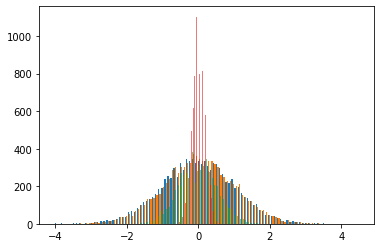

In [20]:

plt.hist((colour_mag),bins=100)
plt.hist((x_recon),bins=100,alpha=0.6)
plt.show()

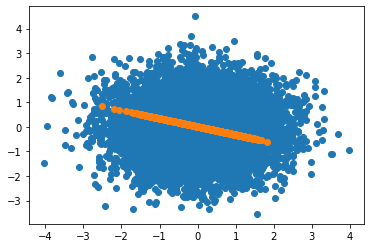

In [21]:
plt.scatter(colour_mag.transpose()[0],colour_mag.transpose()[1])
plt.scatter(x_recon.transpose()[0],x_recon.transpose()[1])
